In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
with h5py.File('results.hdf5', 'r') as f:
    loss_history = f['loss_history'][()]
    param_history = f['param_history'][()]
    true_params = f.attrs['true_params']

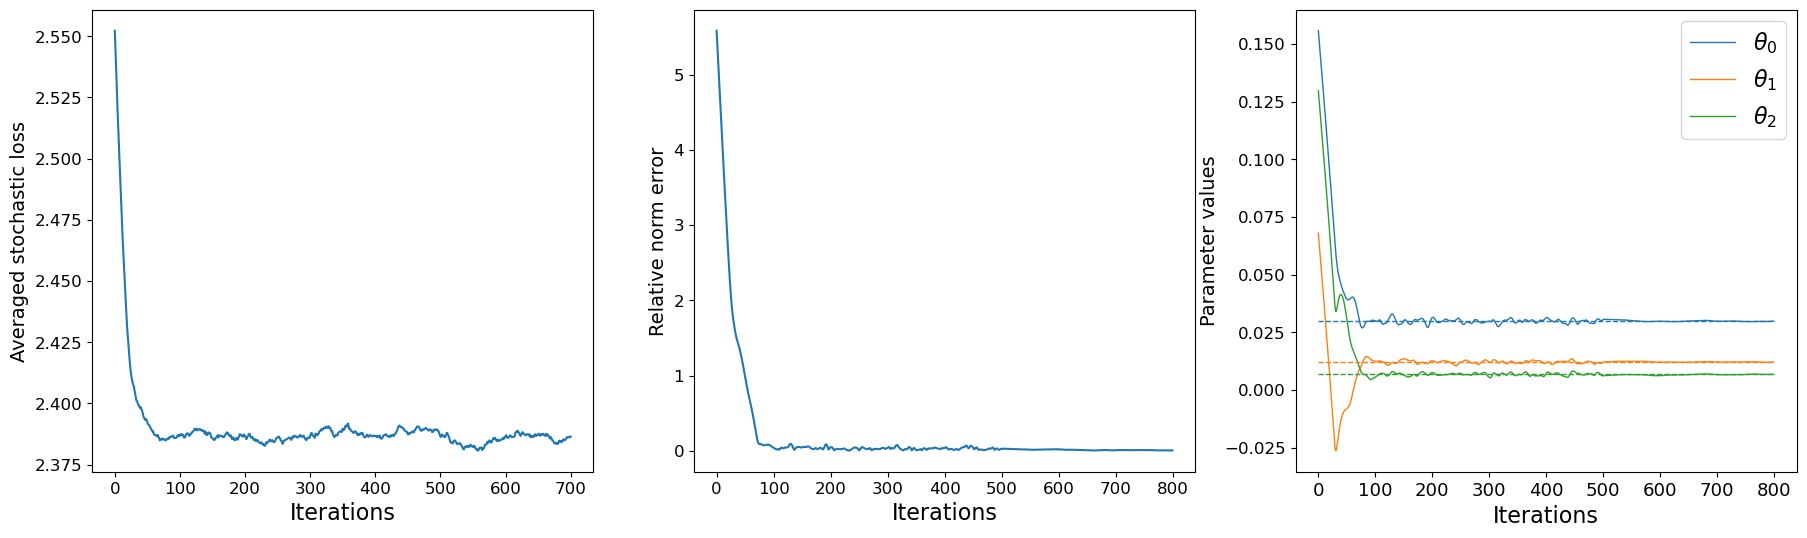

In [3]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 6))
v = 100  # running average for the loss
ax1.plot(np.convolve(loss_history, np.full(v, 1/v), mode='valid'))
ax1.set_ylabel('Averaged stochastic loss',fontsize=14)
ax1.set_xlabel('Iterations',fontsize=16)
ax1.tick_params(axis='both',labelsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
ax2.plot([np.linalg.norm(p - true_params) / np.linalg.norm(true_params) for p in param_history])
ax2.set_ylabel('Relative norm error',fontsize=14)
ax2.set_xlabel('Iterations',fontsize=16)
ax2.tick_params(axis='both',labelsize=12)
a=np.zeros(3)
l=[]
for p in param_history.T[:]:
    l.append(p)
a1,=ax3.plot(l[0], linewidth=1)
a2,=ax3.plot(l[1], linewidth=1)
a3,=ax3.plot(l[2], linewidth=1)
cmap = plt.get_cmap("tab10")
ax3.hlines(true_params[:], xmin=0, xmax=len(p), linewidth=1, linestyle='dashed', color=cmap.colors)
ax3.set_ylabel('Parameter values',fontsize=14)
ax3.set_xlabel('Iterations',fontsize=16)
ax3.legend(handles=[a1,a2,a3],labels=[r'$\theta_0$',r'$\theta_1$',r'$\theta_2$'],loc='best',fontsize=16)
plt.savefig('result_a.pdf',dpi=2000,bbox_inches='tight')

In [4]:
param_history[-1]

array([0.02989045, 0.01217838, 0.00685356])

In [5]:
true_params

array([0.03 , 0.012, 0.007])